# Decision Tree Classifier

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(x,y)

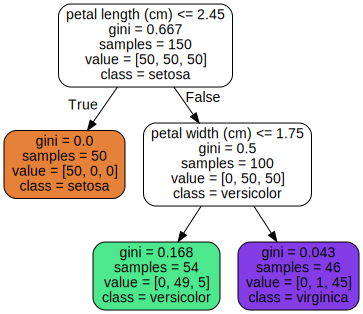

In [21]:
export_graphviz(
    tree_clf,
    out_file = "iris_tree_dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

from graphviz import Source
Source.from_file("iris_tree_dot")

"gini" is a measure of "impurity" of a node, with the value 0 if all members belong to the same class. This is computed as:

$$G_i = 1-\sum_{k=1}^n p_{i,k}^2$$

where $p_{i,k}$ is the ratio of class k instances in the $i^\text{th}$ node. For example the node colored green here has:

$$G_2 = 1-\left(\frac{0}{54}\right)^2-\left(\frac{49}{54}\right)^2-\left(\frac{5}{54}\right)^2\approx 0.168$$



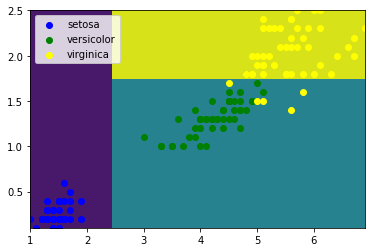

In [44]:
xmin = x[:,0].min()
xmax = x[:,0].max()
ymin = x[:,1].min()
ymax = x[:,1].max()

xx,yy = np.meshgrid(np.linspace(xmin,xmax,1000), np.linspace(ymin,ymax,1000))
z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx,yy,z)

colours = ["blue", "green", "yellow"]
for k in range(0,3):
    class_obs = np.array([x[i] for i in range(len(x)) if y[i]==k])
    plt.scatter(class_obs[:,0], class_obs[:,1], color = colours[k], label = iris.target_names[k])
plt.legend()

Decision Trees also estimate the probability that an instance belongs to class k, by returning the number of true class k observation ending up with the same predicted class as that instance.

In [45]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

# The CART Training Algorithm

Decision trees are trained usign the Classification and Regression Tree (CART) algorithm. Each level of the tree corresponds to splitting the instances at the previous node into two subsets using a single feature $k$ and threshold $t_k$ which are the trained parameters. The cost function minimised is as follows:

$$J(k,t_k) = \frac{m_\text{left}}{m}G_\text{left}+\frac{m_\text{right}}{m}G_\text{right}$$

where $G_\text{left/right}$ are the gini of the two subsets as defined above, and $m_\text{left/right}$ are the number of instances in the two subsets. It stops after reaching the maximum depth or if there is no split that reduces the impurty. There are some additional parameters which can control the stopping point.

* min_samples_split: minimum number of samples a node must have before it can be split
* min_samples_leaf: minimum number of samples a leaf node can have
* min_weight_fraction_leaf: minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
* max_leaf_nodes: maximum number of leaf nodes
* max_features: max number of features evaluated for splitting at each node

Entropy can also be used as an alternative impurity measure, defined as:

$$H_i = -\sum_{k=1, p_{ik}\neq 0}^n p_{ik} \log_2\left(p_{ik}\right)$$

In [54]:
from sklearn.datasets import make_moons

x,y = make_moons(100, noise = 0.15)

xmin = x[:,0].min()
xmax = x[:,0].max()
ymin = x[:,1].min()
ymax = x[:,1].max()

xx,yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))

Text(0.5, 1.0, 'No restrictions')

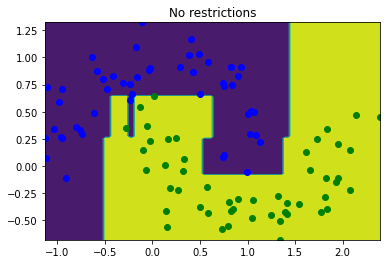

In [59]:
tree1 = DecisionTreeClassifier().fit(x,y)
z = tree1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z)
colours = ["blue", "green", "yellow"]
for k in range(0,2):
    class_obs = np.array([x[i] for i in range(len(x)) if y[i]==k])
    plt.scatter(class_obs[:,0], class_obs[:,1], color = colours[k])
plt.title("No restrictions")

Text(0.5, 1.0, 'Min 4 samples per leaf')

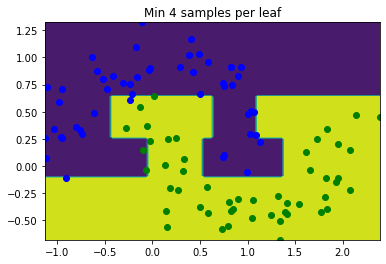

In [58]:
tree2 = DecisionTreeClassifier(min_samples_leaf = 4).fit(x,y)
z = tree2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z)
colours = ["blue", "green", "yellow"]
for k in range(0,2):
    class_obs = np.array([x[i] for i in range(len(x)) if y[i]==k])
    plt.scatter(class_obs[:,0], class_obs[:,1], color = colours[k])
plt.title("Min 4 samples per leaf")

# Decision Tree Regressor

Decision Trees can also perform regression.

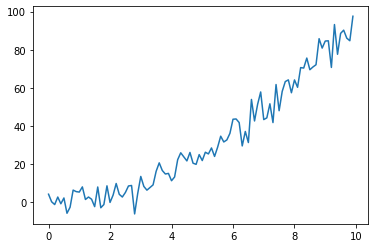

In [70]:
from scipy.stats import norm
x = np.arange(0,10,0.1)
y = x**2 + 5*norm.rvs(size=len(x))
plt.plot(x,y)
x = x.reshape(-1, 1)

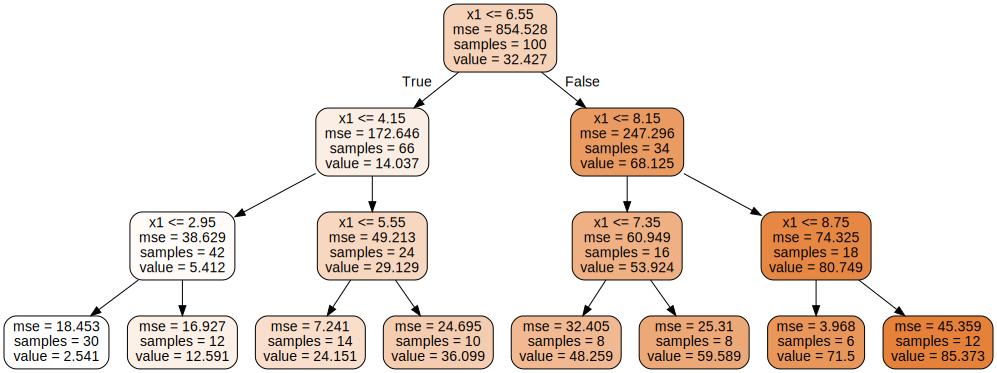

In [77]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 3).fit(x,y)

export_graphviz(
    tree_reg,
    out_file = "regression_tree_dot",
    feature_names = ["x1"],
    rounded = True,
    filled = True
)

from graphviz import Source
Source.from_file("regression_tree_dot")

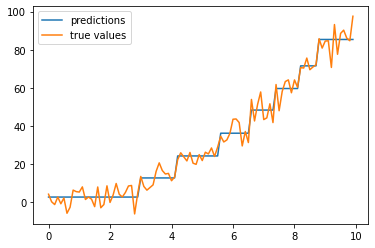

In [80]:
predictions = tree_reg.predict(x)
plt.plot([a[0] for a in x], predictions, label = "predictions")
plt.plot([a[0] for a in x], y, label = "true values")
plt.legend()

The CART algorithm works almost the same as before but now it tries to split the training set in order to minimise the MSE instead of the impurity, using the cost function:

$$J(k,t_k) = \frac{m_\text{left}}{m}MSE_\text{left}+\frac{m_\text{right}}{m}MSE_\text{right}$$

$$MSE_\text{node} = \sum_{i\in \text{node}} \left(\hat{y}_\text{node}-y^{(i)} \right)^2$$

$$\hat{y}_\text{node} = \frac{1}{m_\text{node}}\sum_{i\in\text{node}} y^{(i)}$$

i.e. The value assigned at each node is always the mean of all the training target values in that node.

# Instability

Decision trees are interpretable, versatile and powerful, but have some drawbacks. As an example, the fact that their boundaries are always orthogonal to the axes means they are sensitive to data orientation. This is displayed in the example below.

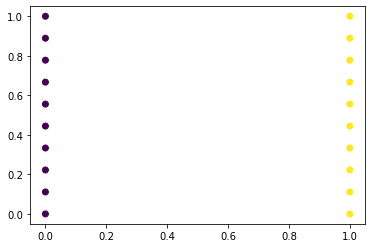

In [114]:
x = [0,1]
y = np.linspace(0,1,10)
x = [[xval,yval] for xval in x for yval in y]
targets = list(map(lambda z: 0 if z[0] <= 0.05 else 1, x))

plt.scatter([z[0] for z in x], [z[1] for z in x], c = targets)

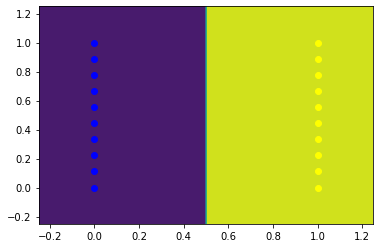

In [115]:
x = np.array(x)
xmin = x[:,0].min()-0.25
xmax = x[:,0].max()+0.25
ymin = x[:,1].min()-0.25
ymax = x[:,1].max()+0.25
xx,yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))

tree_clf = DecisionTreeClassifier(max_depth = 2).fit(x,targets)

z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z)
colours = ["blue", "yellow"]
for k in range(0,2):
    class_obs = np.array([x[i] for i in range(len(x)) if targets[i]==k])
    plt.scatter(class_obs[:,0], class_obs[:,1], color = colours[k])


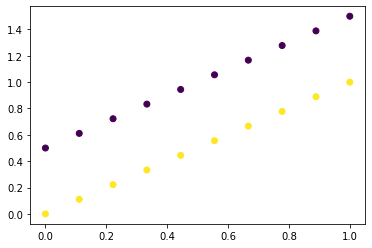

In [121]:
x = np.linspace(0,1,10)
y1 = x+0.5
y2 = x
x = [[xval,yval] for xval, yval in zip(x,y1)]+[[xval,yval] for xval, yval in zip(x,y2)]
targets = [0]*len(y1)+[1]*len(y2)

plt.scatter([z[0] for z in x], [z[1] for z in x], c = targets)

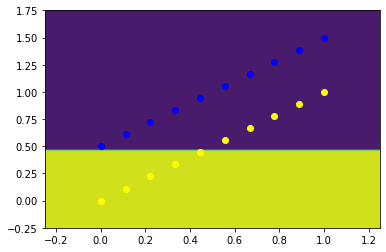

In [124]:
x = np.array(x)
xmin = x[:,0].min()-0.25
xmax = x[:,0].max()+0.25
ymin = x[:,1].min()-0.25
ymax = x[:,1].max()+0.25
xx,yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))

tree_clf = DecisionTreeClassifier(max_depth = 2).fit(x,targets)

z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z)
colours = ["blue", "yellow"]
for k in range(0,2):
    class_obs = np.array([x[i] for i in range(len(x)) if targets[i]==k])
    plt.scatter(class_obs[:,0], class_obs[:,1], color = colours[k])

Without a restriction this data can still be classified perfectly, but will be much less likely to generalise well.

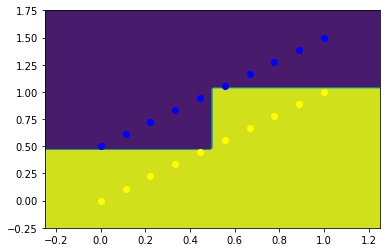

In [125]:
x = np.array(x)
xmin = x[:,0].min()-0.25
xmax = x[:,0].max()+0.25
ymin = x[:,1].min()-0.25
ymax = x[:,1].max()+0.25
xx,yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))

tree_clf = DecisionTreeClassifier().fit(x,targets)

z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z)
colours = ["blue", "yellow"]
for k in range(0,2):
    class_obs = np.array([x[i] for i in range(len(x)) if targets[i]==k])
    plt.scatter(class_obs[:,0], class_obs[:,1], color = colours[k])

More generally these trees will be very sensitive to any small variations in the data. As a result decision trees are now mostly used in combination in ensembles, as we will look at next.

# Ensemble Learning and Random Forests

A random forest trains a group of Decision Tree Models each on a random subset of the training data, and aggregate the predictions of each model to assign a prediction to a new instance. Ensembles more generally combining multiple models to build a more powerful model, with three common approaches being bagging, boosting and stacking. 

The idea of such a model is for the mistakes of one constituent to be made up for by others not making the same mistake. An ensemble where all constituents always output the same thing as each other will be no better than the constituents on their own, and conversely the more diveristy in the constituents the better for an ensemble. Let's train a basic voting classifier from three diverse models. The parameter voting = "hard" means that it is just a majority vote across the constituent models. If they all can also predict probabiltiies then voting = "soft" can be used, which instead computes average probability for each class and assigns the instance to the most probable class. This allows highly confident predictions from one model to have higher influence than low confidence ones from the others.

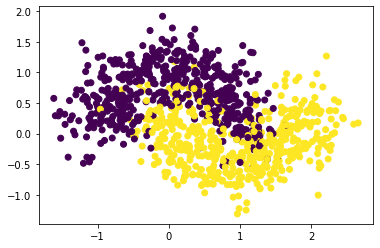

In [175]:
x,y = make_moons(1000, noise = 0.3)
plt.scatter(x[:,0], x[:,1], c = y)

In [178]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [("lr", log_clf), ("rf",rnd_clf), ("svc", svm_clf)],
    voting = "hard"
)

voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [179]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.828
RandomForestClassifier 0.896
SVC 0.916
VotingClassifier 0.912


# Bagging and Pasting

The importance of diversity in constituent models of an ensemble has been mentioned already. In the previous example this is achieved by using completely different models. Another approach is to use the same model but train on different random subsets of the data. This approach is called bagging (when sampling with replacement) or pasting (when performed without replacement). This can be a classic case of the bias-variance tradeoff. Each constituent will have higher bias than if it was trained on the full data. However the aggregated model will typically have similar bias and lower variance. These approaches also scale well as the constituent models can be trained in parallel.

In [181]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

single_tree_clf = DecisionTreeClassifier()

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1
)

paste_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = False, n_jobs = -1
)

single_tree_clf.fit(x_train, y_train)
bag_clf.fit(x_train, y_train)
paste_clf.fit(x_train, y_train)

tree_pred = single_tree_clf.predict(x_test)
bag_pred = bag_clf.predict(x_test)
paste_pred = paste_clf.predict(x_test)

Text(0.5, 1.0, 'Pasting Ensemble, Accuracy = 0.92')

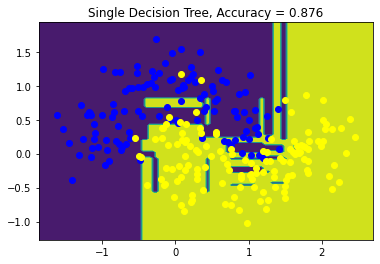

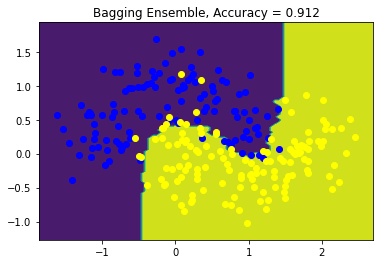

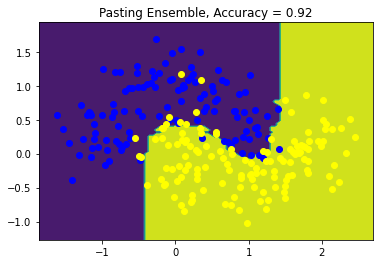

In [186]:
xmin = x_test[:,0].min()-0.25
xmax = x_test[:,0].max()+0.25
ymin = x_test[:,1].min()-0.25
ymax = x_test[:,1].max()+0.25
xx,yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))

z_tree = single_tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
z_bag = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
z_paste = paste_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx,yy,z_tree)
colours = ["blue", "yellow"]
for k in range(0,2):
    class_obs = np.array([x_test[i] for i in range(len(x_test)) if y_test[i]==k])
    plt.scatter(class_obs[:,0], class_obs[:,1], color = colours[k])
plt.title(f"Single Decision Tree, Accuracy = {accuracy_score(y_test, tree_pred)}")

fig = plt.figure()
plt.contourf(xx,yy,z_bag)
colours = ["blue", "yellow"]
for k in range(0,2):
    class_obs = np.array([x_test[i] for i in range(len(x_test)) if y_test[i]==k])
    plt.scatter(class_obs[:,0], class_obs[:,1], color = colours[k])
plt.title(f"Bagging Ensemble, Accuracy = {accuracy_score(y_test, bag_pred)}")

fig = plt.figure()
plt.contourf(xx,yy,z_paste)
colours = ["blue", "yellow"]
for k in range(0,2):
    class_obs = np.array([x_test[i] for i in range(len(x_test)) if y_test[i]==k])
    plt.scatter(class_obs[:,0], class_obs[:,1], color = colours[k])
plt.title(f"Pasting Ensemble, Accuracy = {accuracy_score(y_test,paste_pred)}")

In the above we see the ensemble models achieve higher accuracy on the unseen test data. In particular the decision boundaries are less complicated and likely to generalise better, owing to the lower variance. By default bagging samples $m$ isntances where $m$ is the size of the training data, but without replacement, meaning for each constituent not all of the data is seen in training. Such instances are called out-of-bag (oob) and provide a natural unseen set of test data. By setting oob_score = True we can automatically include an oob evaluation which average the oob evaluations of each constituent. In the example below we end up with oob_score exactly the same as the accuracy on the unseen test set. 

In [187]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1, oob_score = True
)

bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.912

The bagging classifier also support sampling the features. This is controlled by the max_features and bootstrap_features hyperparameters, which are similar to the max_samples and bootstrap hyperparameters above except that they apply to feature sampling instead of instance sampling. Sampling both instances and features is known as Random Patches, while sampling features only is called Random Subspaces.

# Random Forests

We have applied random forests above but not defined what they are. They are ensembles of decision Trees, generally trained via bagging, with max_samples being the size of the training set. Random Forest also introduces randomness to the process of growing the trees, instead of searching for the best feature split using all features it searches for the best split among a random subset of features only, in order to further achieve diversity between the constituents of the ensemble. Another approach, known as Extremely Randomised Trees, goes further than this by also using random thresholds to split on any feature instead of training the splitting threshold like a standard Decision Tree. These models can be found in SciKit-Learn's ExtraTreesClassifier class.

## Feature Importance

Another useful quality of random forests is that they provide an indication of the relative importance of each feature in making predictions, by looking at how much the nodes that use that fearure reduce impurity on average.

In [189]:
rnd_clf.feature_importances_

array([0.4403943, 0.5596057])

# Boosting

Boosting refers to any ensemble method that can combine several weak learners into a strong learner. The general idea is to train predictors sequentially, with each trying to correct the mistakes of the previous one. Two popular approaches are as follows.

## AdaBoost

The idea here is for the next predictor to pay more attention the the instances misclassified by the previous one. The algorithm first trains a model, e.g. DecisionTreeClassifier, on the training data. It then increases the relative weight of the misclassifeid instances and trains a second model using those weights. This process continues aiming to produce better and better predictors. When the training is complete, predictions are made similarly to bagging or pasting except that each predictor has a different weight depending on it's accuracy on the weighted training set. 

Each instance weight $w^{(i)}$ is initially $\frac{1}{m}$. A predictor is trained and it's error rate $r_1$ is computed, defined by :

$$r_j = \frac{\sum_{i=1}^{m} w^{(i)} \{\hat{y}^{(i)}_j \neq y^{(i)}\}} {\sum_{i=1}^{m} w^{(i)}}$$

The predictor's weight is then computed as:

$$\alpha_j = \eta \log\frac{1-r_j}{r_j}$$

where  $\eta$ is the learning rate hyperparameter. Then the weights of the training instances are updated as follows:

$$w^{(i)} = \begin{cases} 
                w^{(i)} & \text{ if } \hat{y}_j^{(i)} = y^{(i)} \\
                w^{(i)}\exp(\alpha_j) & \text{ otherwise}
            \end{cases}$$
            
before being normalised so that they sum to 1. The algorithm continues until a desired number of predictors is reached or a perfect predictor is found. For any new instance then the predicted class is determined by summing the number of constituents predicting each class, weighted by their weights $\alpha_j$. That is:

$$\hat(y)(x) = \text{argmax} \sum_{j=1}^N \alpha_j \{\hat{y}_j(x) = k\}$$

In [190]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators = 200, algorithm = "SAMME.R", learning_rate = 0.5
)
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.904

##  Gradient Boosting

Similarly this approach trains a sequence of predictors each improving on the previous, however instead of varying weights across the training instances it fits the new predictor to the residual errors made by the previous predictor. We will look at an example using Decision Trees for a regression task.

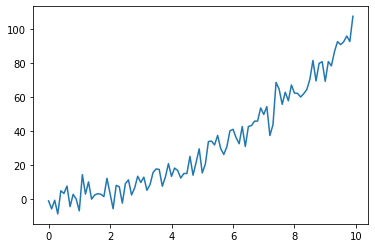

In [193]:
from scipy.stats import norm
x = np.arange(0,10,0.1)
y = x**2 + 5*norm.rvs(size=len(x))
plt.plot(x,y)
x = x.reshape(-1, 1)

In [199]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth = 2)
tree_reg1.fit(x,y)

DecisionTreeRegressor(max_depth=2)

In [200]:
y2 = y-tree_reg1.predict(x)
tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(x,y2)

DecisionTreeRegressor(max_depth=2)

In [201]:
y3 = y2-tree_reg2.predict(x)
tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(x,y3)

DecisionTreeRegressor(max_depth=2)

Text(0.5, 1.0, 'MSE = 42.692205023202774')

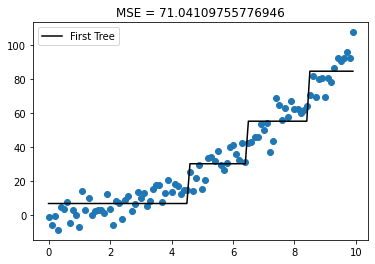

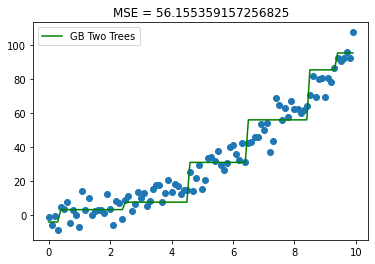

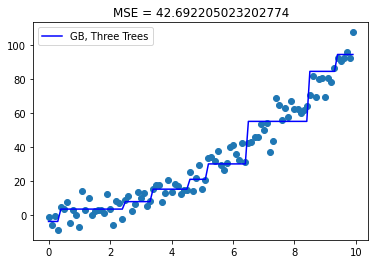

In [206]:
from sklearn.metrics import mean_squared_error

pred1 = tree_reg1.predict(x)
pred2 = tree_reg2.predict(x)+pred1
pred3 = tree_reg3.predict(x)+pred2

mse1 = mean_squared_error(y, pred1)
mse2 = mean_squared_error(y, pred2)
mse3 = mean_squared_error(y, pred3)


fig = plt.figure()
plt.scatter(x,y)
plt.plot(x,pred1, "k-", label = "First Tree")
plt.legend()
plt.title(f"MSE = {mse1}")

fig = plt.figure()
plt.scatter(x,y)
plt.plot(x, pred2, "g-", label = "GB Two Trees")
plt.legend()
plt.title(f"MSE = {mse2}")

fig = plt.figure()
plt.scatter(x,y)
plt.plot(x, pred3, "b-", label = "GB, Three Trees")
plt.legend()
plt.title(f"MSE = {mse3}")


Unsurprisingly this can be done all in one go in SciKit-Learn, through the GradientBoostingRegressor class.

Text(0.5, 1.0, 'MSE = 42.69220502320276')

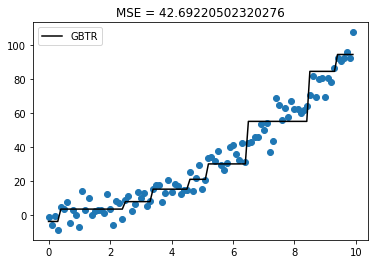

In [207]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1)
gbrt.fit(x,y)

pred = gbrt.predict(x)
mse = mean_squared_error(y, pred)

fig = plt.figure()
plt.scatter(x,y)
plt.plot(x,pred, "k-", label = "GBTR")
plt.legend()
plt.title(f"MSE = {mse}")

Early stopping is commonly used to find the optimal number of trees. This can be implemented using the staged_predict() method, which returns an iterator over the predctions made at each stage of training. Using this we can check the validatiuon error at each step to determine the optimal number of trees.

Text(0.5, 1.0, 'Regression Function')

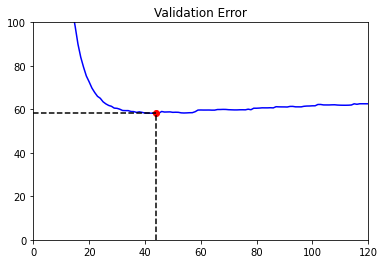

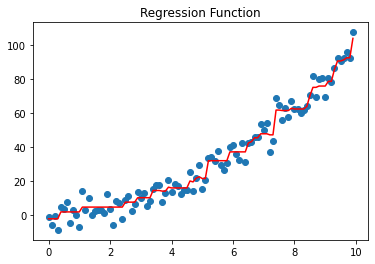

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(x_test)]
n_estimators = np.argmin(errors)+1

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = n_estimators)
gbrt_best.fit(x,y)

fig = plt.figure()
plt.plot(list(range(1,121)), errors, "b-")
plt.plot(n_estimators, errors[n_estimators], "ro")
plt.plot([n_estimators]*2, [0, errors[n_estimators]], "k--")
plt.plot([0, n_estimators], [errors[n_estimators]]*2, "k--")
plt.xlim(0,120)
plt.ylim(0, 100)
plt.title("Validation Error")

fig = plt.figure()
plt.scatter(x,y)
plt.plot(x, gbrt_best.predict(x), "r-")
plt.title("Regression Function")

This can also be implemented by actually stopping training early, instead of training a larger number of predictors and then looking for the point where validation error is minimised. This is achieved by setting warm_start = True, which makes SciKit-Learn keep existing trees when fit() is called, allowing incremental training. The below example stops training when the validation error does not improve for five consecutive iterations.

Text(0.5, 1.0, 'Regression Function')

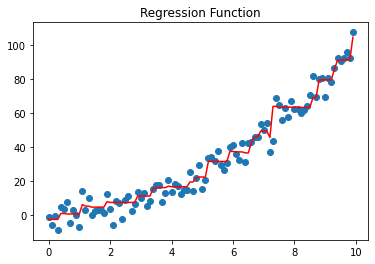

In [217]:
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start = True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(x_train, y_train)
    y_pred = gbrt.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error<min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up == 5:
            break
            

fig = plt.figure()
plt.scatter(x,y)
plt.plot(x, gbrt.predict(x), "r-")
plt.title("Regression Function")

An optimised version of gradient boosting is available in the XGBoost library. In the second example we see that this also includes early stopping built in.


Text(0.5, 1.0, 'Regression Function')

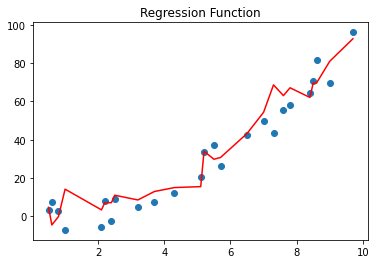

In [227]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train,y_train)
y_pred = xgb_reg.predict(x_test)

fig = plt.figure()
plt.scatter(x_test,y_test)
plt.plot(sorted(x_test), xgb_reg.predict(sorted(x_test)), "r-")
plt.title("XGBoost Regression Function")

[0]	validation_0-rmse:30.10348
[1]	validation_0-rmse:22.17891
[2]	validation_0-rmse:16.26845
[3]	validation_0-rmse:12.50249
[4]	validation_0-rmse:10.12199
[5]	validation_0-rmse:8.93743
[6]	validation_0-rmse:8.29780
[7]	validation_0-rmse:7.99052
[8]	validation_0-rmse:7.94838
[9]	validation_0-rmse:8.00640


Text(0.5, 1.0, 'XGBoost with Early Stopping Regression Function')

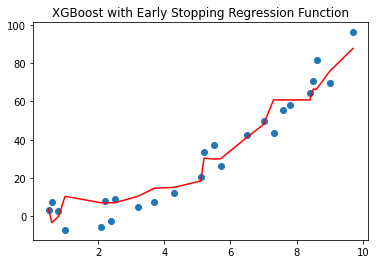

In [229]:
xgb_reg.fit(x_train, y_train, eval_set = [(x_test, y_test)], early_stopping_rounds = 2)
y_pred = xgb_reg.predict(x_test)

fig = plt.figure()
plt.scatter(x_test,y_test)
plt.plot(sorted(x_test), xgb_reg.predict(sorted(x_test)), "r-")
plt.title("XGBoost with Early Stopping Regression Function")

# Stacking

We previously used simple voting to aggregate predictions of an ensemble of models. What if we instead train another model to perform this aggregation? This is the concept of stacking, where our ensemble of models feeds into another model, referred to as a blender or meta-learner, which aggregates their outputs to a final prediction. A common approach to train this is to use a hold-out set. The training set is split into two subsets. The first of these is used to train each of the predictors in the first layer. Then the second subset is fed into the trained models of the first layer and their outputs are used to train the meta-learner. We can go further since this second subset could clearly be used to independently train mutliple meta-learners, and so if we initally split into three subsets instead we could train a whole second layer of models followed by a single aggregator and so on.

SciKit-Learn does not directly support stacking but it is not too hard to implement manually and there are open source packages available, such as DESlib.